# Ex. 1

**Steps** : 

  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes

  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation

  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples

  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.

  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.

## Sol. 1

### Load data

In [1]:
import pandas as pd 
import numpy as np

data_path = 'Data/'
results_path = 'Results/'

# Load training and testing data
train_data = pd.read_csv(data_path + "train.csv")
test_data = pd.read_csv(data_path + "test.csv")

X_train = train_data[["X", "Y"]].to_numpy(dtype=np.double)
C_train = train_data["C"].to_numpy(dtype=np.int32).reshape(-1, 1)

X_test = test_data[["X", "Y"]].to_numpy(dtype=np.double)
C_test = test_data["C"].to_numpy(dtype=np.int32).reshape(-1, 1)

### Visualise data

Text(0, 0.5, 'y')

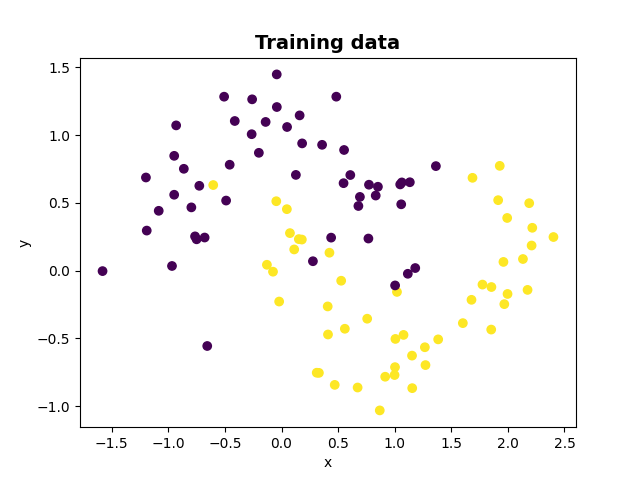

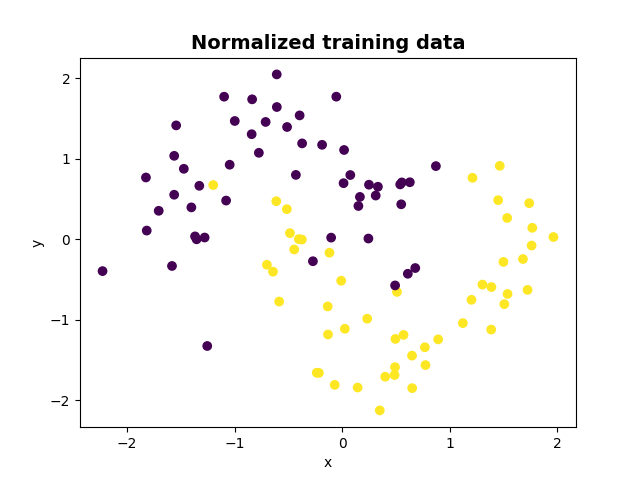

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt #  matplotlib for visualization

# Visualize original data
fig1 = plt.figure()
plt.title("Training data", fontsize=14, fontweight="bold")
plt.scatter(X_train[:,0], X_train[:,1], c=C_train)
plt.xlabel("x")
plt.ylabel("y")

# Normalize dataset
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train_norm = (X_train - mu) / sigma

# Visualize normalized data
fig2 = plt.figure()
plt.title("Normalized training data", fontsize=14, fontweight="bold")
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], c=C_train)
plt.xlabel("x")
plt.ylabel("y")

### Implement MLP using numpy

In [3]:
class MLP(object):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):        
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def loss(self, yHat, y):
        # Compute loss for given X,y, use weights already stored in class.
        # J = 0.5*sum((y-yHat)**2) # FIXME: MSE loss has to be replaced by CrossEntropy
        H = np.multiply(-y, np.log(yHat)) - np.multiply((1-y), np.log(1-yHat))
        J = 1/y.size * np.sum(H) # CrossEntropy
        return J

    def lossPrime(self, yHat, y):
        # Compute the derivative of the loss for given yHat, y
        # dJdyHat = -(y - yHat) # FIXME: MSE loss has to be replaced by CrossEntropy
        dJdyHat = np.divide(-y, yHat) + np.divide(1-y, 1-yHat)
        return dJdyHat
        
    # Derivative of parameters
    def backward(self,X, yHat, y):
        self.yHat = yHat
        
        delta3 = np.multiply(self.lossPrime(yHat, y), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        return dJdW1,dJdW2

### Train MLP and visualise decision boundary

In [4]:
def train(NN,X, y,epoch = 10000,lr = .1):
    list_loss = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)
        
        gradW1,gradW2 = NN.backward(X,yHat,y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr 
        NN.W2 -= gradW2 * lr
        
        if i%100 == 0 : 
            loss = NN.loss(yHat,y)
            print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)
        
    return list_loss


NN = MLP(hiddenNode=20)
#Train network with the data:
list_loss = train(NN, X_train_norm, C_train, epoch=10000, lr=0.01)

Loss 0=2.114935882819403
Loss 100=0.3230404650537792
Loss 200=0.29293403076062896
Loss 300=0.2484384859879139
Loss 400=0.20978448436633282
Loss 500=0.18432948513767056
Loss 600=0.16840973243570764
Loss 700=0.15819479731873615
Loss 800=0.1513450583760058
Loss 900=0.14654612581974605
Loss 1000=0.14305193400179103
Loss 1100=0.14042275139560084
Loss 1200=0.13838699983926148
Loss 1300=0.13676911862360097
Loss 1400=0.1354510288891262
Loss 1500=0.13435076586447964
Loss 1600=0.13341011553318852
Loss 1700=0.13258710961712894
Loss 1800=0.13185124899373402
Loss 1900=0.13118034652070276
Loss 2000=0.13055838753941582
Loss 2100=0.12997405712847232
Loss 2200=0.12941970804991051
Loss 2300=0.1288906049708387
Loss 2400=0.12838431319851795
Loss 2500=0.12790012949635868
Loss 2600=0.12743849690963044
Loss 2700=0.12700040580451555
Loss 2800=0.1265868391240466
Loss 2900=0.12619834416905054
Loss 3000=0.12583479312712026
Loss 3100=0.1254953407627009
Loss 3200=0.12517853007291213
Loss 3300=0.12488246692245779
L

In [5]:
# TODO: Visualize the decision boundary of the classification in 2D plot

(0.0, 2.2155305395983396)

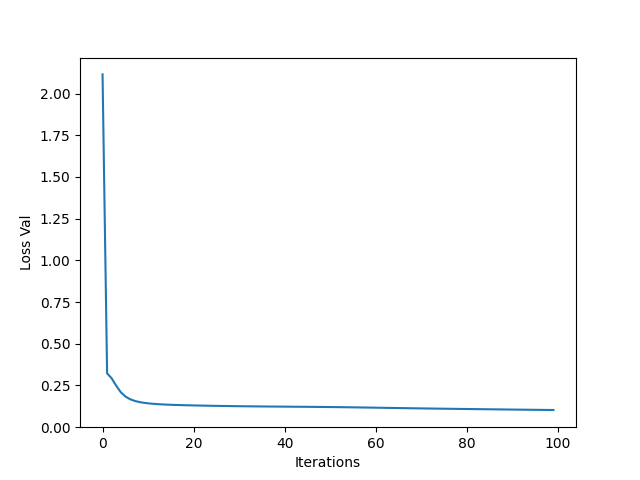

In [6]:
%matplotlib widget

# Visualize loss function iterations
fig3 = plt.figure()
plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.ylim(0, None)

### Classify the data in test.csv using the trained MLP

# Ex. 2

Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum. 
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.

**Steps** : 

  1. Try to understand how momentum is implemented reading carefully https://ruder.io/optimizing-gradient-descent/index.html#momentum, or https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom. 

  3. Train the MLP implmented in numpy with this new optimizer. 

  4. Use different values for the momentum paramter `[0,1]` and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.

## Sol. 2

# Ex. 3

**Steps** : 

  1. Do the same as Ex. 1 but implementing the `MLP` using `PyTorch`.

  2. Train different vesions of the `MLP` by varying the number of hidden neurons and learing rates

  3. Analyse the results in each case and discuss them.

> HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in `PyTorch` you have to use in this case.

## Sol. 3